In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [76]:
def triangular_grid2d(l, h, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    print(N_h)
    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[]}
    sensor_coverage = []

    count = 0
    for x in range(0, int(N_l)):
        for y in range(0, int(N_h)):
            if y % 2 != 0:
                # Odd
                x_p = (d * x) 
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))
            else:
                x_p = (d * x) + (d/2)
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))

            count += 1
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

def triangular_grid2d_inverse(l, h, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    print(N_h)
    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[]}
    sensor_coverage = []

    count = 0
    for x in range(0, int(N_h)):
        for y in range(0, int(N_l)):
            if y % 2 != 0:
                # Odd
                x_p = (d * x) 
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))
            else:
                x_p = (d * x) + (d/2)
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))

            count += 1
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

def triangular_grid3d(l, h, depth, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    N_d = np.ceil(((2*np.sqrt(3)*depth-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)

    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[], 'z':[]}
    sensor_coverage = []

    count = 0
    for z in range(0, int(N_d)):
        for x in range(0, int(N_h)):
            for y in range(0, int(N_l)):
                if z % 2 == 0:
                    if y % 2 != 0:
                        # Odd
                        x_p = (d * x) 
                        y_p = dy * y
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                    else:
                        x_p = (d * x) + (d/2)
                        y_p = dy * y
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                else:
                    if y % 2 != 0:
                        # Odd
                        x_p = (d * x) + (d/2)
                        y_p = dy *  + (d/2)
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                    else:
                        x_p = (d * x) + (d/2) + (d/2)
                        y_p = dy * y + (d/2)
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
  
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

In [77]:
h = 1e3
l = 1e3
depth = 3e3
r = 100

7.0
N_i : 6.0 | N_h : 7.0 | N_total : 42.0 | d/r : 1.7320508075688772 | count : 42 | d : 173.20508075688772 | dy : 150.0 | dl : 86.60254037844386 | dh : 50.0
Optimal number of clusters (k): 4


(-157.63139720814414, 1110.2593413710267, -155.0, 1055.0)

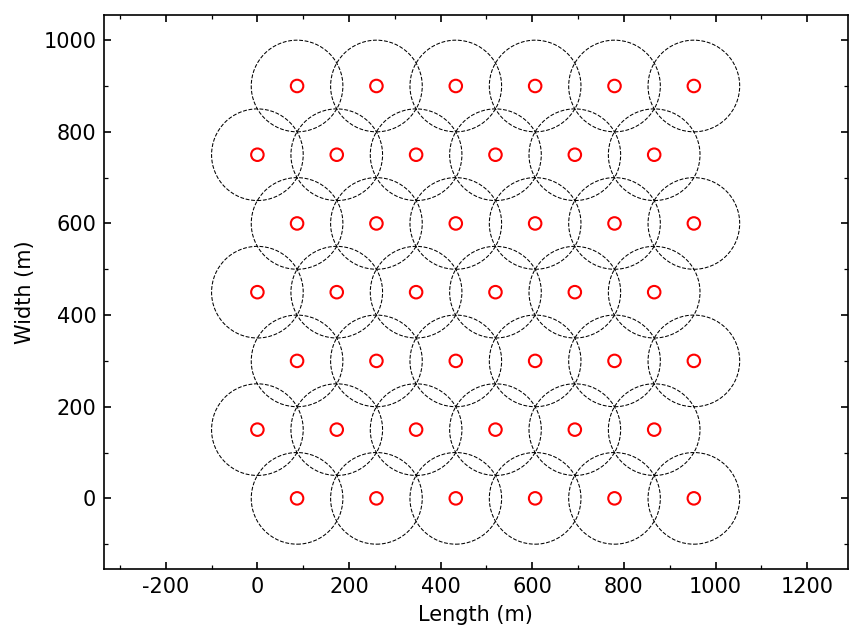

In [78]:
fig, ax = plt.subplots(dpi=150)
ax.yaxis.set_major_locator(MultipleLocator(int(l//5)))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(int(l//10)))
ax.xaxis.set_major_locator(MultipleLocator(int(h//5)))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(int(h//10)))
ax.tick_params(top=True, right=True, which='both', direction='in')

sensor_pos1, sensors_coverage1 = triangular_grid2d(l, h, r)
ax.scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')

for sensor_coverage in sensors_coverage1:
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5, linestyle='--')
    ax.add_patch(circle)

sensor_pos1['E'] = []
for _ in range(len(sensor_pos1['x'])):
    sensor_pos1['E'].append(5)

X = np.column_stack((sensor_pos1['x'], sensor_pos1['y'], sensor_pos1['E']))
k_values = range(2, 10)
silhouette_scores = []

# Loop through different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)



# Find the optimal number of clusters (k) with the maximum silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k): {optimal_k}")

ax.set_xlabel('Length (m)')
ax.set_ylabel('Width (m)')
plt.axis('equal')

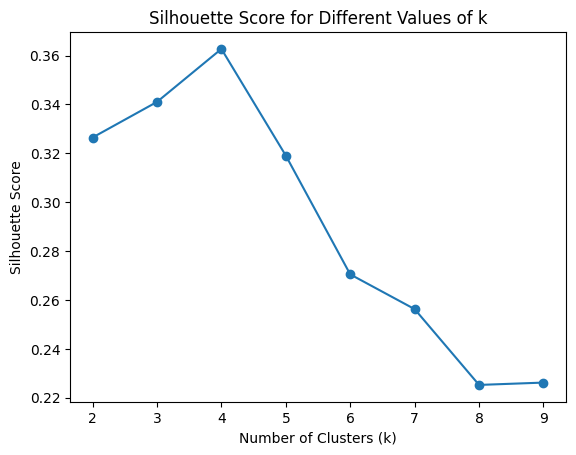

In [79]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

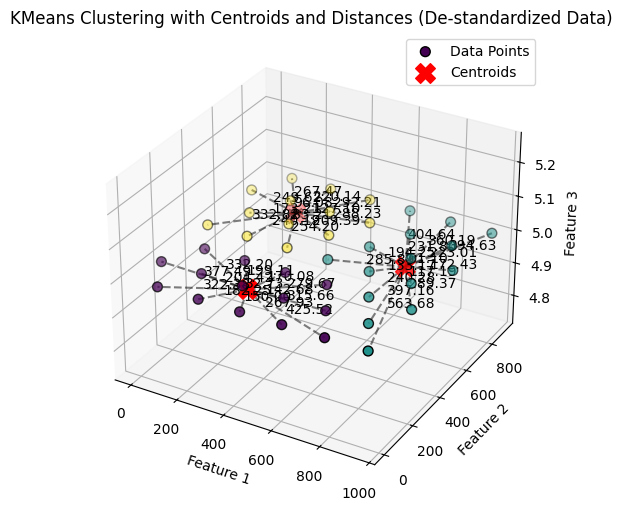

In [102]:
k = 5
X = np.column_stack((sensor_pos1['x'], sensor_pos1['y'], sensor_pos1['E']))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters (k)
k = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the standardized data
kmeans.fit(X_scaled)

# Get the cluster labels, centroids, and distances
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the de-standardized data points in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X_destandardized = scaler.inverse_transform(X_scaled)
ax.scatter(X_destandardized[:, 0], X_destandardized[:, 1], X_destandardized[:, 2], c=labels, cmap='viridis', edgecolors='k', s=50, label='Data Points')

# Plot the de-standardized centroids
centroids_destandardized = scaler.inverse_transform(centroids)
ax.scatter(centroids_destandardized[:, 0], centroids_destandardized[:, 1], centroids_destandardized[:, 2], c='red', marker='X', s=200, label='Centroids')

# Calculate and plot the distances between centroids and points within each cluster
for i, centroid in enumerate(centroids_destandardized):
    points_in_cluster = X[labels == i]
    distances = np.linalg.norm(points_in_cluster - centroid, axis=1)
    for point, distance in zip(points_in_cluster, distances):
        ax.plot([centroid[0], point[0]], [centroid[1], point[1]], [centroid[2], point[2]], linestyle='--', color='black', alpha=0.5)
        ax.text((centroid[0] + point[0]) / 2, (centroid[1] + point[1]) / 2, (centroid[2] + point[2]) / 2, f'{distance:.2f}', color='black')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering with Centroids and Distances (De-standardized Data)')
ax.legend()
plt.show()